In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats  # 과학용 계산 라이브러리
from sklearn.datasets import load_linnerud
from sklearn.model_selection import train_test_split

In [30]:
dataset = pd.read_csv("C:/Users/user/Downloads/Salary_Data.csv")

In [31]:
dataset.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

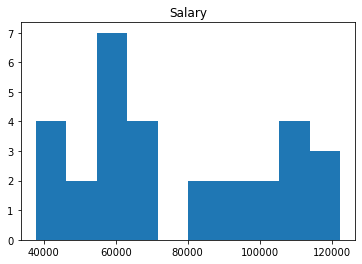

In [32]:
df.describe()
plt.hist(df['Salary'])
plt.title('Salary')
plt.show()

In [33]:
X=df[['Salary']]

In [34]:
Y=df[['YearsExperience']]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.25,random_state=42)

In [36]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation = 'relu', input_shape = (1,)))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 64)                128       
                                                                 
 dense_11 (Dense)            (None, 32)                2080      
                                                                 
 dense_12 (Dense)            (None, 16)                528       
                                                                 
 dense_13 (Dense)            (None, 8)                 136       
                                                                 
 dense_14 (Dense)            (None, 1)                 9         
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


In [38]:
N_EPOCHS = 100
history = model.fit(X_train, y_train, epochs = N_EPOCHS, validation_data=(X_test, y_test))

Epoch 1/100
1/1 [==============================] - 1s 782ms/step - loss: 32987502.0000 - mse: 32987502.0000 - val_loss: 12880620.0000 - val_mse: 12880620.0000
Epoch 2/100
1/1 [==============================] - 0s 49ms/step - loss: 8090965.0000 - mse: 8090965.0000 - val_loss: 4342848.5000 - val_mse: 4342848.5000
Epoch 3/100
1/1 [==============================] - 0s 38ms/step - loss: 2728333.0000 - mse: 2728333.0000 - val_loss: 1876972.6250 - val_mse: 1876972.6250
Epoch 4/100
1/1 [==============================] - 0s 32ms/step - loss: 1179383.1250 - mse: 1179383.1250 - val_loss: 1245991.5000 - val_mse: 1245991.5000
Epoch 5/100
1/1 [==============================] - 0s 32ms/step - loss: 782997.7500 - mse: 782997.7500 - val_loss: 933111.3750 - val_mse: 933111.3750
Epoch 6/100
1/1 [==============================] - 0s 43ms/step - loss: 586438.0625 - mse: 586438.0625 - val_loss: 634551.3750 - val_mse: 634551.3750
Epoch 7/100
1/1 [==============================] - 0s 33ms/step - loss: 398859.

Epoch 60/100
1/1 [==============================] - 0s 33ms/step - loss: 0.9983 - mse: 0.9983 - val_loss: 0.8996 - val_mse: 0.8996
Epoch 61/100
1/1 [==============================] - 0s 33ms/step - loss: 0.9867 - mse: 0.9867 - val_loss: 0.9208 - val_mse: 0.9208
Epoch 62/100
1/1 [==============================] - 0s 33ms/step - loss: 0.9815 - mse: 0.9815 - val_loss: 0.9371 - val_mse: 0.9371
Epoch 63/100
1/1 [==============================] - 0s 28ms/step - loss: 0.9792 - mse: 0.9792 - val_loss: 0.9487 - val_mse: 0.9487
Epoch 64/100
1/1 [==============================] - 0s 44ms/step - loss: 0.9783 - mse: 0.9783 - val_loss: 0.9565 - val_mse: 0.9565
Epoch 65/100
1/1 [==============================] - 0s 36ms/step - loss: 0.9780 - mse: 0.9780 - val_loss: 0.9613 - val_mse: 0.9613
Epoch 66/100
1/1 [==============================] - 0s 33ms/step - loss: 0.9779 - mse: 0.9779 - val_loss: 0.9641 - val_mse: 0.9641
Epoch 67/100
1/1 [==============================] - 0s 33ms/step - loss: 0.9778 - m

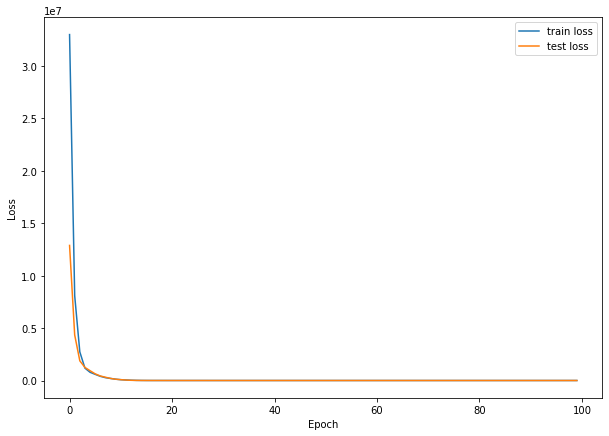

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

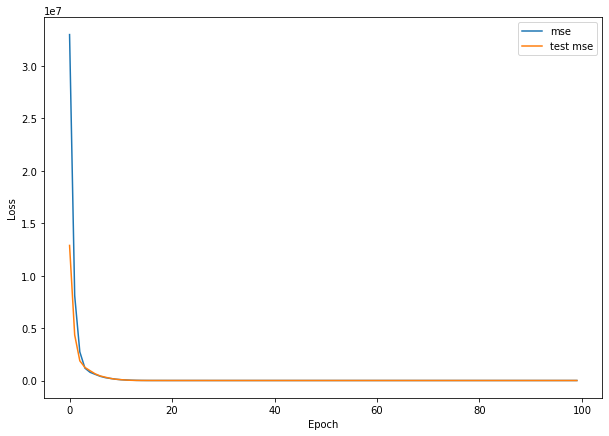

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['mse'], label='mse')
plt.plot(range(N_EPOCHS), history.history['val_mse'], label='test mse')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [41]:
test_mse_score, test_mae_score=model.evaluate(X_test, y_test)


1/1 [==============================] - 0s 27ms/step - loss: 0.9672 - mse: 0.9672
